In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [ ]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
#удаляем полные дубликаты, сохраняя при этом первое вхождение строки. Число строк снизилось с 1000 до 500
data=data.drop_duplicates(keep='first')
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Меня, при этом, заинтресовал пункт score, имеющий параметр Nan (то есть отсутствие данных), чтобы убедиться, не осталось ли строк с одинаковым названием, я провела дополнительный анализ, ища теперь строки с уникальным назанием. Если число строк равняется полученным выше результатам, дубликатов не осталось

In [ ]:
#сортировка с удалением дубликатов по названию
data_titlies=data.drop_duplicates (subset=['title'], keep='first')
data_titlies

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Как можно увидеть, число строк сократилось с 500 до 496. Единственный, на мой взгляд, возможный вариант для этого - если строка с фильмом отличалась от строки с таким же фильмом по возрастному рейтингу (rating), пользовательскому рейтингу шоу(user rating score), описание рейтинга (ratingDescription), либо году выпуска (release year).

Первым, что я решила проверить был рейтинг шоу (т.к. он может быть либо числом, либо тем самым Nan- отсутствием числа. 

Также можно предположить, что в случае с сериалами/серией фильмов, составители базы данных могли брать рейтинги для каждого сезона, выходящего в разные года. 

Для начала проверила данные, удаля дубликаты по всем столбцам, кроме последнего.

In [ ]:
#повторяющиеся строки по всем столбцам, кроме пользовательского рейтинга 
data_without_score=data_titlies.drop_duplicates (subset=['title', 'rating', 'ratingLevel', 'release year'])
data_without_score

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Данный вариант решения показался мне недостаточно рабочим и муторным, так как пришлось бы проверять каждый столбец, сравнивая его с исходным количеством строк после полного удаления дублей. 


Поэтому я придумала другой способ решения данной проблемы. 

У нас изначально было 500 уникальных строк и 496 уникальных названий. Отсюда дублей по названию должно быть 4 (500-496). Я решила найти именно эти дубли и их оригиналы и сравнивать уже их.

In [ ]:
#находим повторяющиеся сортируя по столбцу "название". Первые вхождения
dupliс_last = data[data.duplicated(['title'], keep='last')]
dupliс_last

,title,rating,ratingLevel,release year,user rating score
151,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0


In [ ]:
#находим повторяющиеся сортируя по столбцу "название". Последние вхождения
dupliс_first = data[data.duplicated(['title'], keep='first')]
dupliс_first

,title,rating,ratingLevel,release year,user rating score
181,Skins,TV-MA,NaN,2017,NaN
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0


Выводы: строки различаются не только названием, но и рейтингом, описаним рейтинга,годом и рейтингу. Часть из представленного в выборке - сериалы (как скинс), а часть фильмы (звездные войны). Соответственно, сделанное мною предположение о том, что составитель базы данных брал разные сериалы/фильмы с одинаковым нахванием. 

Проведя поиск в интернете получаем:

Skins - 2013 года - Американский сериал
Skins - 2017 года - Испанский драматический фильм

Bordertown с рейтингом TV-14 - анимационный сериал https://en.wikipedia.org/wiki/Bordertown_(American_TV_series)
Bordertown с рейтингом TV-MA - сериал про полицейского https://www.netflix.com/title/80145143

Star Wars: The Clone Wars	2008 года - анимационный фильм https://www.kinopoisk.ru/film/405607/
Star Wars: The Clone Wars	2014 года - анимационный сериал https://www.kinopoisk.ru/series/229861/

Goosebumps	1998 года - сериал "Мурашки" https://www.kinopoisk.ru/series/255995/
Goosebumps	2015 года - фильм "Ужастики" - https://www.kinopoisk.ru/film/463237/





Разумней брать датасет из 500 строк, в котором учтен данный момент. Оставляем исходное data в качестве баз даных



In [ ]:
#считаем количество строк 
num_rows = data.shape[0]

print('В нашем проекте', num_rows, 'уникальных значений.')

В нашем проекте 500 уникальных значений.


### Сколько рейтинговых групп представлено в данных?

In [ ]:
#удалила из столбца неизвестные данные (nan),посчитала и вывела все уникальные значения:
print('Представлено', len(data.ratingLevel.dropna().unique( )), 'рейтинговых групп. К ним относятся:')
data.ratingLevel.dropna().unique( ).tolist()

Представлено 99 рейтинговых групп. К ним относятся:


['crude and sexual humor, language and some drug content',
 'strong violence, sexual content and adult language',
 'Parents strongly cautioned. May be unsuitable for children ages 14 and under.',
 'Parental guidance suggested. May not be suitable for all children.',
 'For mature audiences.  May not be suitable for children 17 and under.',
 'language and brief violence',
 'Suitable for all ages.',
 'This movie has not been rated.',
 'Suitable for children ages 7 and older.  Content contains fantasy violence.',
 'bloody war violence, language throughout and some sexual material',
 'This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.',
 'some thematic elements, rude humor and action',
 'pervasive language, some sexual material, violence and drug use',
 'mild thematic elements',
 'strong crude sexual content, pervasive language, and drug use',
 'for action, peril and brief language',
 'some sexual material, and langu

In [ ]:
#Посчитаем количество элементов в каждой группе возрастного рейтинга 

data["rating"].value_counts()

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'График частоты появления каждого возрастного рейтинга в исходной базе данных')

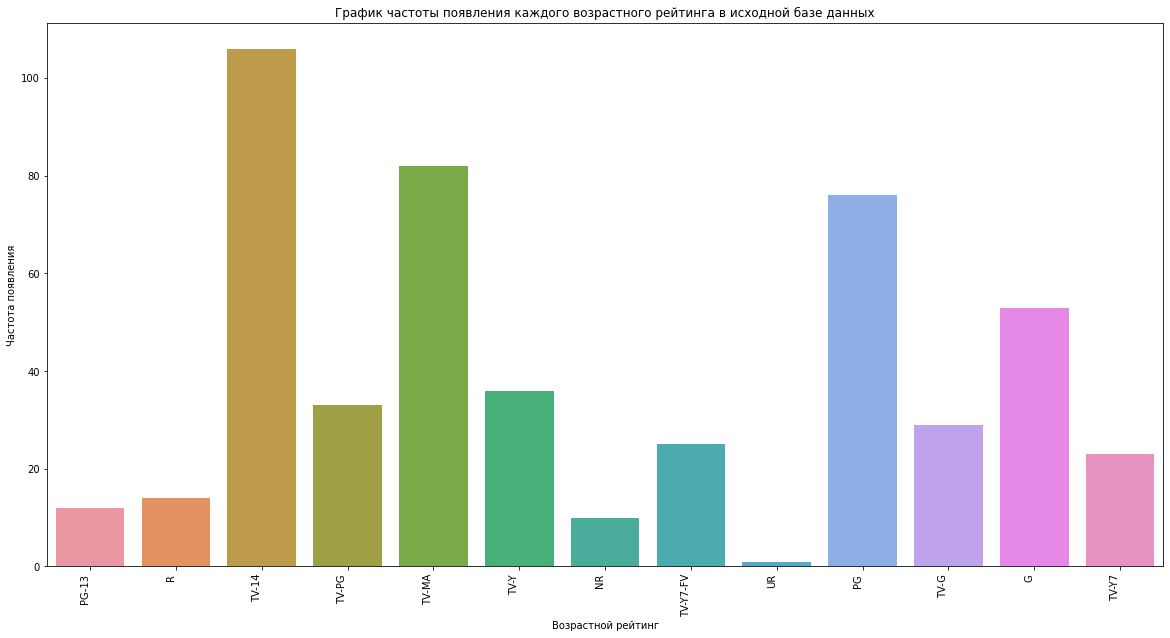

In [ ]:
#Построим гистограмму возрастного рейтинга

sns.countplot(data['rating'])
sns.countplot(data['rating']).set_xticklabels(sns.countplot(data['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.xlabel("Возрастной рейтинг")
plt.ylabel("Частота появления")
plt.title("График частоты появления каждого возрастного рейтинга в исходной базе данных")

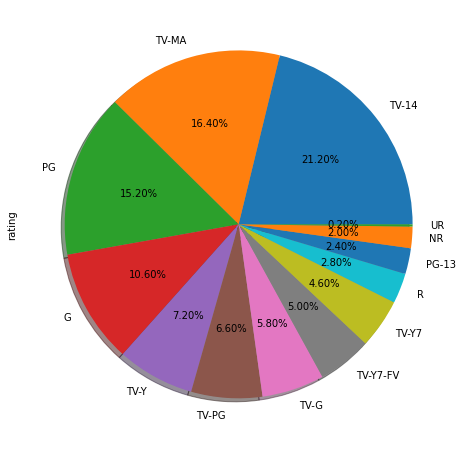

In [ ]:
#Cтроим круговую диаграмму 

data['rating'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8))
plt.show()

Из круговой диаграммы видно, что большую часть занимают TV-14, TV-MA, PG. Самое большое значение у TV-14 (21,20%). Данная возрастная группа состоит из фильмов, которые не рекомендованы для просмотра лицам младше 14 лет. 
Следующая категория - TV-MA (16,40%) фильмы для взрослой аудитории (MA От "Mature Audience" - зрелая аудитория), то есть для людей от 17 и старше (аналог 16+ в России. 
Третий по популярности - рейтинг PG (15,20%). Фильмы, при просмотре которых рекомендовано присутствие родителей. 

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

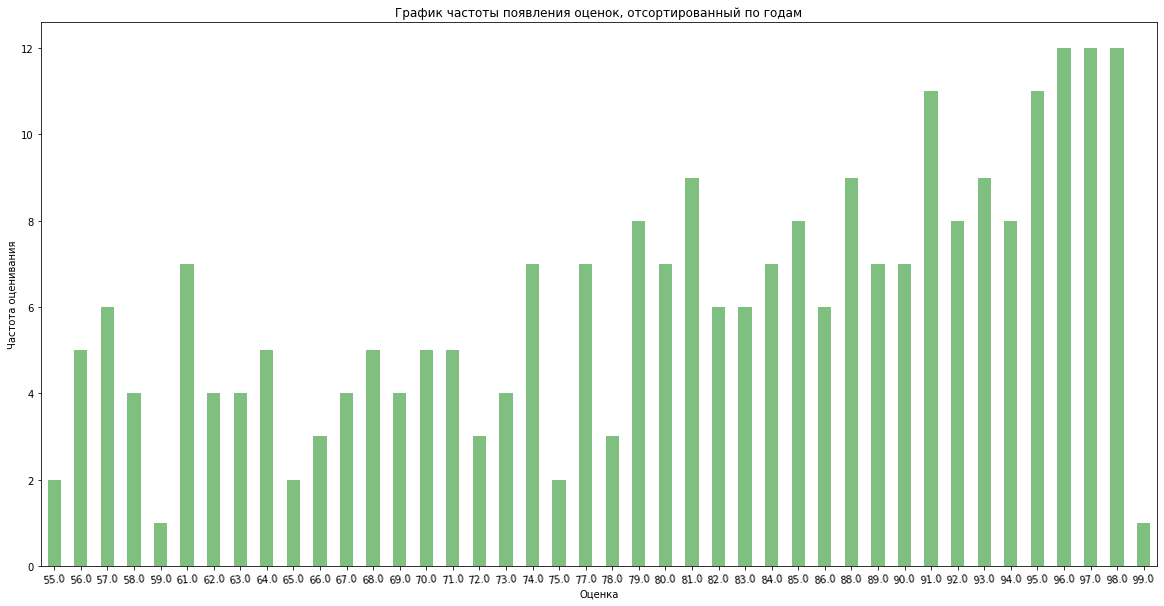

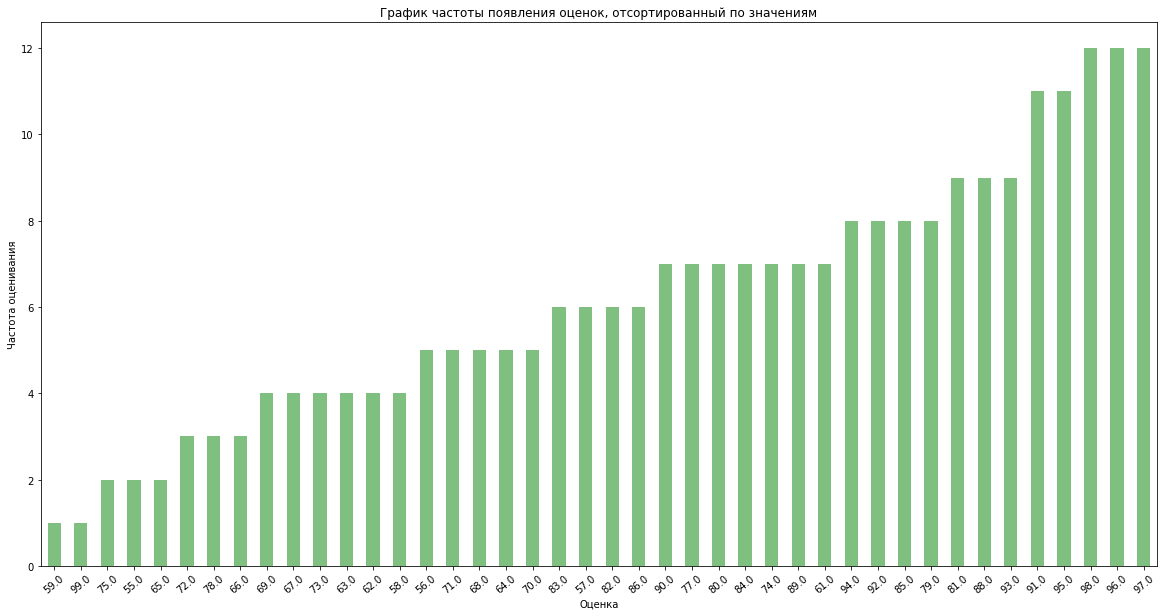

In [ ]:
#подсчитываем количество каждой оценки, поставленной пользователями 
rating_value__tot = data['user rating score'].value_counts().sort_index(ascending= True)

#Строим гистограмму
plt.figure(figsize=(20,10))
rating_value__tot.plot.bar(color='green',alpha=0.5)
plt.xticks(rotation=5)
plt.xlabel("Оценка")
plt.ylabel("Частота оценивания")
plt.title("График частоты появления оценок, отсортированный по годам")
plt.show()

#подсчитываем количество каждой оценки, поставленной пользователями 
rating_value__tot = data['user rating score'].value_counts().sort_values(ascending= True)

#Строим гистограмму
plt.figure(figsize=(20,10))
rating_value__tot.plot.bar(color='green',alpha=0.5)
plt.xticks(rotation=5)
plt.xlabel("Оценка")
plt.ylabel("Частота оценивания")
plt.title("График частоты появления оценок, отсортированный по значениям")
plt.show()


Чаще всего появляются оценки 97, 96, 98 - по 12 штук. 


Примечательно, что максимальный балл находится в конце списка и встречается всего один раз. Можно предположить, что работает человеческий фактор и накладывая оценки друг на друга мы получаем их среднее значение. Если один из 10 человек посчитает, что фильм не на 100 баллов, а только на 40, то их среднее значение выйдет в 94 балла. 

Этот процесс, в целом, подходит под нормальное распределение значений.  

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
# вызываем функцию "describe", описывая столбец с оценками пользователей
data['user rating score'].describe( )

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

Определимся с показателями, которые можно увидеть из функции describe.

Count - Подсчитывает количество ненулевых показателей. В данном случае 256. 244 фильма не имели рейтинга, но от этих результатов не стоит отказываться, потому что у них можно сделать выводы по остальным показателям - жанр, год и т.д.

mean - среднее значеие. У нас в датасете это 81.398438. Довольно высокая оценка, которую можно подтвердить, посмотрев на гистограмму из прошлого пункта заданий. Наибольшая частота оценок находится в интервале от 88 до 98.

std - стандартное отклонение наблюдей. Имеет под собой дополнительный показатель - процентиль (25%, 50%, 75%). 

Медиана - это тоже самое, что и 50% процентиль. Она равна 83.500.

max - максимальное значение, равное 99. Также подтверждается на гистограмме. 

min - минимальное значение, равное 55.
____________
Медиана, равная 83.50, отличается от среднего значения, равного 81.398438, на 2.201562. Происходит это из-за того, что:
- среднее значение - это сумма данных, поделенная на количество;
- медиана - это среднее в выборке. 

Среднее значение не показывает истинной картины, оно не учитывает, что показатели могут быть ненормированно распределены по всей линии. 
Медиана в данном случае, приоритетней для использования. Она показывает значение, половина выборки для которого будет лежать в левой части графика нормального распределения (будет меньше этого значения), а половина будет лежать справа (будет больше медианы). 

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
print('Шоу запускались с', data['release year'].min(), 'по', data['release year'].max())
sorted_years=data['release year'].value_counts().sort_index(ascending= True)
print('Выборка по годам представляет из себя:', sorted_years, sep='\n')

Шоу запускались с 1940 по 2017
Выборка по годам представляет из себя:
1940      1
1976      1
1978      1
1982      2
1986      1
1987      1
1989      2
1990      2
1991      1
1992      1
1993      5
1994      4
1995      2
1996      1
1997      9
1998      9
1999      5
2000      7
2001      6
2002      5
2003     11
2004      7
2005     10
2006     10
2007      8
2008     11
2009     10
2010     13
2011     15
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
Name: release year, dtype: int64


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

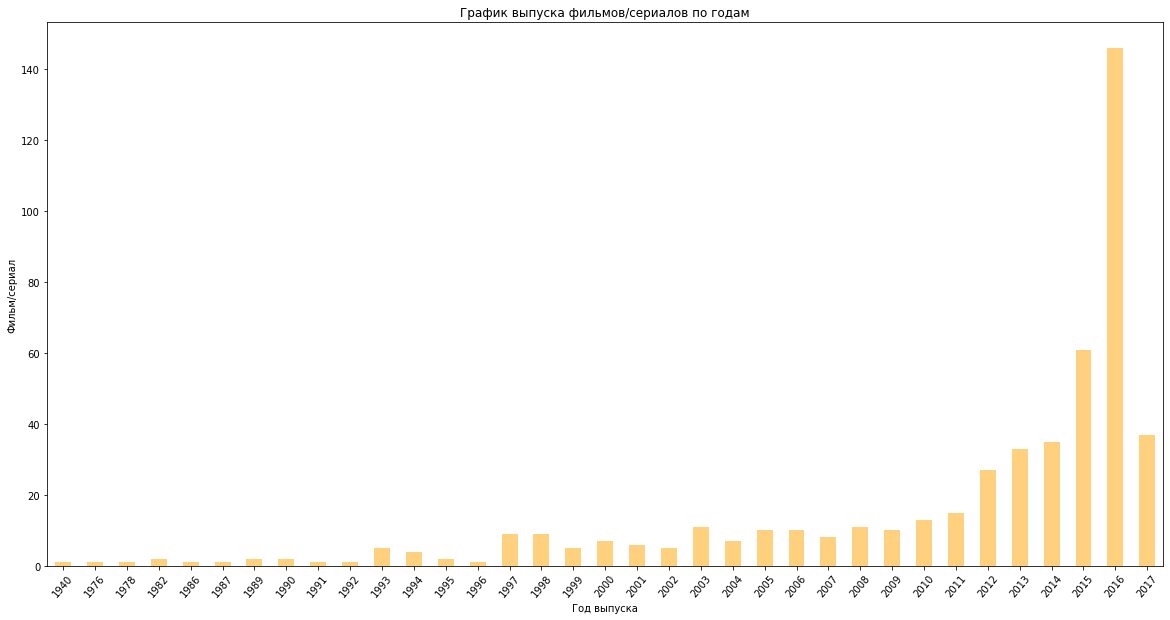

In [ ]:
#построим гистограмму распредления по годам

plt.figure(figsize=(20,10)) #размер графика
data['release year'].value_counts().sort_index(ascending= True).plot.bar(color='orange', alpha=0.5) #
plt.xticks(rotation=50)
plt.xlabel("Год выпуска")
plt.ylabel("Фильм/сериал")
plt.title("График выпуска фильмов/сериалов по годам")

plt.show()

Начиная с 1997 можно наблюдать медленный рост выпуска новых шоу. Заметный рост можно увидеть с 2012 года. Первый скачок шоу, представленных в датасете, произошел в 2015 году. В следующем, 2016 году, самое большое количество выпущенных фильмов (146), но после этого такой же резкий спад до 37. 

Можно было бы посчитать, что пик в 2016 - это выброс, так он в 2 раза превышает ближайшее значение (2015 год с 61 фильмом). На деле же, это может быть связано с тем, что базы данных изначальано составлены для площадки Нетфликс. Они могли быть заинтересованны в определенных фильмах, отбирая их для своего сайта основываясь на их популярности в масс-медиа, жанрах, трендах и прочем. Действительно ли эти 146 фильмов были единственными выпущенными в тот год? Конечно же нет, это лишь выборка для конкретного случая. 

Также за выбросы можно посчитать выбросами фильмы до 1993 года (примерно) поскольку они выходят за диапазон трех сигм, а также имеют в себе малые значений, которые, по логике, не должны  быть важны для нас, как для исследования. На мой взгляд, нам стоит оставить их. 

По этим данным можно будет делать дополнительную программу рекомендаций для пользователя, предлагая ему фильмы из этого диапазона лет. 

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



In [ ]:
#сначала выводим датасет, отфильтрофанный по годам, с подсчетом оценок и количеством фильмов
data.groupby(['release year','user rating score']).count()

title  rating  ratingLevel
release year user rating score                            
1940         61.0                   1       1            1
1978         86.0                   1       1            1
1982         68.0                   1       1            1
1986         67.0                   1       1            1
1987         58.0                   1       1            1
...                               ...     ...          ...
2017         93.0                   1       1            1
             94.0                   2       2            1
             96.0                   1       1            0
             98.0                   1       1            0
             99.0                   1       1            1

[177 rows x 3 columns]

In [ ]:
#дальше выводим только 2 последних года
#tail - количество элементов с конца списка. число 44 получила отсортировав список выше с помощью встроенных возможностей колаба
data.groupby(['release year','user rating score']).count().tail(44)


title  rating  ratingLevel
release year user rating score                            
2016         56.0                   1       1            1
             57.0                   2       2            1
             58.0                   1       1            1
             61.0                   5       5            4
             62.0                   2       2            2
             69.0                   3       3            3
             70.0                   1       1            1
             71.0                   1       1            1
             73.0                   1       1            1
             74.0                   3       3            3
             77.0                   3       3            3
             78.0                   2       2            1
             79.0                   3       3            3
             80.0                   3       3            2
             83.0                   2       2            2
             84.0                   4       4            4
             85.0                   2       2            2
             86.0                   2       2            2
             88.0                   1       1            1
             89.0                   2       2            2
             90.0                   3       3            3
             91.0                   5       5            5
             92.0                   4       4            4
             93.0                   2       2            2
             94.0                   2       2            2
             95.0                   6       6            6
             96.0                   6       6            6
             97.0                   8       8            8
             98.0                   6       6            6
2017         71.0                   1       1            0
             72.0                   1       1            1
             80.0                   1       1            1
             81.0                   1       1            1
             82.0                   1       1            1
             88.0                   1       1            1
             89.0                   1       1            0
             90.0                   1       1            1
             91.0                   1       1            1
             92.0                   1       1            0
             93.0                   1       1            1
             94.0                   2       2            1
             96.0                   1       1            0
             98.0                   1       1            0
             99.0                   1       1            1

In [ ]:
#здесь я решила сначала отсортировать данные, выделив 2016 год и сгруппировать показатели по пользовательсим оценкам

rating_2016=data.loc[data['release year'] == 2016].groupby(['user rating score']).count()
rating_2016


,title,rating,ratingLevel,release year
user rating score,,,,
56.0,1,1,1,1
57.0,2,2,1,2
58.0,1,1,1,1
61.0,5,5,4,5
62.0,2,2,2,2
69.0,3,3,3,3
70.0,1,1,1,1
71.0,1,1,1,1
73.0,1,1,1,1


In [ ]:
#затем сделала тоже самое, но для 2017
rating_2017=data.loc[data['release year'] == 2017].groupby(['user rating score']).count()
rating_2017

,title,rating,ratingLevel,release year
user rating score,,,,
71.0,1,1,0,1
72.0,1,1,1,1
80.0,1,1,1,1
81.0,1,1,1,1
82.0,1,1,1,1
88.0,1,1,1,1
89.0,1,1,0,1
90.0,1,1,1,1
91.0,1,1,1,1


Text(0.5, 1.0, 'График оценивания')

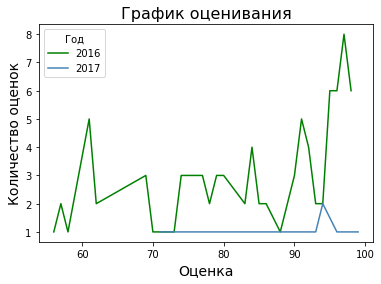

In [ ]:
#построила графики распределения
plt.plot(rating_2016['title'], label='2016', color='green')
plt.plot(rating_2017['title'], label='2017', color='steelblue')

plt.legend(title='Год')

plt.ylabel('Количество оценок', fontsize= 14 )
plt.xlabel('Оценка', fontsize= 14 )
plt.title('График оценивания', fontsize= 16 )

Выводы:
Успешней был 2016 год. Как по количеству снятых фильмов - 146 против 37, так и по количеству оценок. В 2017 почти у всех фильмов стояло по одной оценке в диапазоне от 71 до 99. Единственное исключение - оценка 92, которую поставили дважды. 
В 2016 диапазон разброса был гораздо больше - здесь можно встретить как оценку 56, так и оценку 98. Больше половины оценок получило ни менее 3 оценок (негативный отклик - тоже отклик). Самый высокий пик приходится на значение 97 баллов. следующая "ступенька" приходится на ближайший диапазон - от 95 до 98 баллов. 

Можно было бы сделать вывод, что 2017 был успешней, поскольку у него была наивышая оценка (99), которой не было в 2016, но я считаю, что 2016 выигрывает по другим показателям - количеству оцениваний; фильмов, которые оценили и общей средней. 

Добавлю к исследованию выше описание через describe.

In [ ]:
rating_2016.describe()

,title,rating,ratingLevel,release year
count,29.000000,29.000000,29.000000,29.000000
mean,2.965517,2.965517,2.827586,2.965517
std,1.841637,1.841637,1.872145,1.841637
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000
max,8.000000,8.000000,8.000000,8.000000


In [ ]:
rating_2017.describe()

,title,rating,ratingLevel,release year
count,15.000000,15.000000,15.000000,15.000000
mean,1.066667,1.066667,0.666667,1.066667
std,0.258199,0.258199,0.487950,0.258199
min,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000


### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

Все зависит от ситуации. Если у нас цель показать доли чего-то, то лучше использовать круговую диаграмму, где весь круг - это 100%, а все остальное - какая-то часть от него. Здесь можно наглядно посмотреть какой показатель сколько занимает от общего числа. По круговой диаграмме выше мы сразу бросаем взгляд на большие куски - на синий(TV-14) на оранжевый (TV-MA) и темно-зеленый (PG). Можем сразу сделать вывод о том, сколько в действительности весит каждая часть.
В случае с гистограммами, их приоритетней использовать, когда нужно показать изменяющийся во времени объект. Как в случае с фильмами в течении года. С помощью гистограммы проще строить тренды и делать прогнозы. 



### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
# В качестве шоу для анализа был выбран сериал "Black mirror"

# Вновь вызовем базу данных, чтобы вернуть удаленные в самом начале столбцы с описанием фильма
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
data_new=data.drop_duplicates(keep='first')
data_new

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


In [ ]:
#теперь выведем строку с сериалом Черное зеркало 
data_new.loc[data_new['title'] == 'Black Mirror']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
17,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,110,2016,80.0,80


Здесь видно, что наш возрастной рейтинг - TV-MA. Давайте для начала проверим данное шоу в этой возрастной категории


In [ ]:
#выводим фильмы рейтинга TV-MA
what_that=data_new.loc[data_new['rating'] == 'TV-MA']
what_that['user rating score'].describe()

count    40.000000
mean     84.825000
std      12.775954
min      56.000000
25%      80.000000
50%      89.000000
75%      95.000000
max      99.000000
Name: user rating score, dtype: float64

In [ ]:
#считаю, количество оценок 
graph1=what_that['user rating score'].dropna().value_counts().sort_index(ascending= True)
graph1

56.0    1
57.0    2
61.0    1
63.0    2
71.0    1
78.0    1
79.0    1
80.0    2
81.0    1
82.0    2
83.0    1
84.0    2
85.0    1
86.0    1
89.0    2
90.0    2
91.0    2
93.0    1
94.0    3
95.0    3
96.0    1
97.0    2
98.0    4
99.0    1
Name: user rating score, dtype: int64

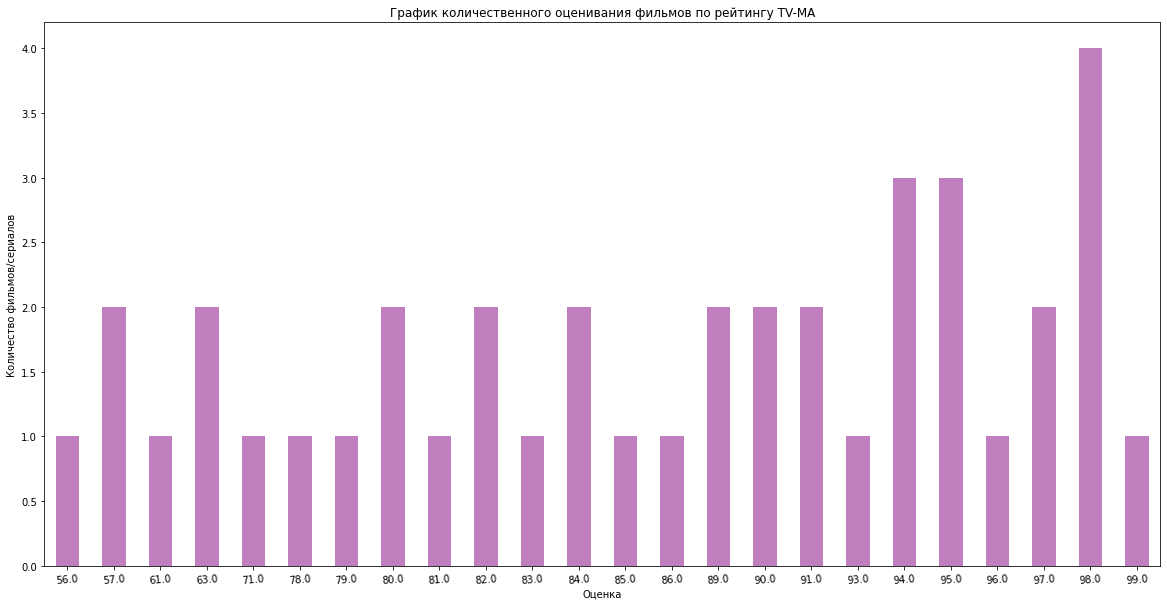

In [ ]:
#строим график зависимости количество оценок от, собственно, оценки для рейинга TV-MA
plt.figure(figsize=(20,10)) #размер графика
graph1.plot.bar(color='purple', alpha=0.5) #
plt.xticks(rotation=5)
plt.xlabel("Оценка")
plt.ylabel("Количество фильмов/сериалов")
plt.title("График количественного оценивания фильмов по рейтингу TV-MA")

plt.show()

У нас имеется 40 значений, которые мы рассматриваем. Минимальное значение - 56, максимальное - 99. Среднее значение - 84,825, а наиболее часто встречается значение 89.
По данным о фильме, которые мы вывели выше, рейтинг сериала Black Mirror равен 80, что на 9 баллов ниже самой частой оценки, на 19 меньше наибольшего значения, но при этом находится на границе 25% процентиля, а значит в целом его можно назвать сравнительно высоким.  

In [ ]:

#теперь сравним фильм по году выпуска. Черное зеркало вышло в 2016 году. 
checking_year=data_new.loc[data_new['release year'] == 2016].dropna()

#Выборка фильмов для этого года выглядит следующим образом: 
checking_year

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,70,2016,98.0,80
11,Sherlock,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
...,...,...,...,...,...,...,...
633,Kung Fu Panda 3,PG,martial arts action and some mild rude humor,60,2016,92.0,80
640,Alice Through the Looking Glass,PG,fantasy action/peril and some language,60,2016,96.0,80
645,Goldie & Bear,TV-Y,Suitable for all ages.,10,2016,77.0,80
735,Bunk'd,TV-G,Suitable for all ages.,35,2016,61.0,80


In [ ]:
#Считаю, сколько фильмов по каждой оценке 
graph2=checking_year['user rating score'].dropna().value_counts().sort_index(ascending= True)
graph2

56.0    1
57.0    1
58.0    1
61.0    4
62.0    2
69.0    3
70.0    1
71.0    1
73.0    1
74.0    3
77.0    3
78.0    1
79.0    3
80.0    2
83.0    2
84.0    4
85.0    2
86.0    2
88.0    1
89.0    2
90.0    3
91.0    5
92.0    4
93.0    2
94.0    2
95.0    6
96.0    6
97.0    8
98.0    6
Name: user rating score, dtype: int64

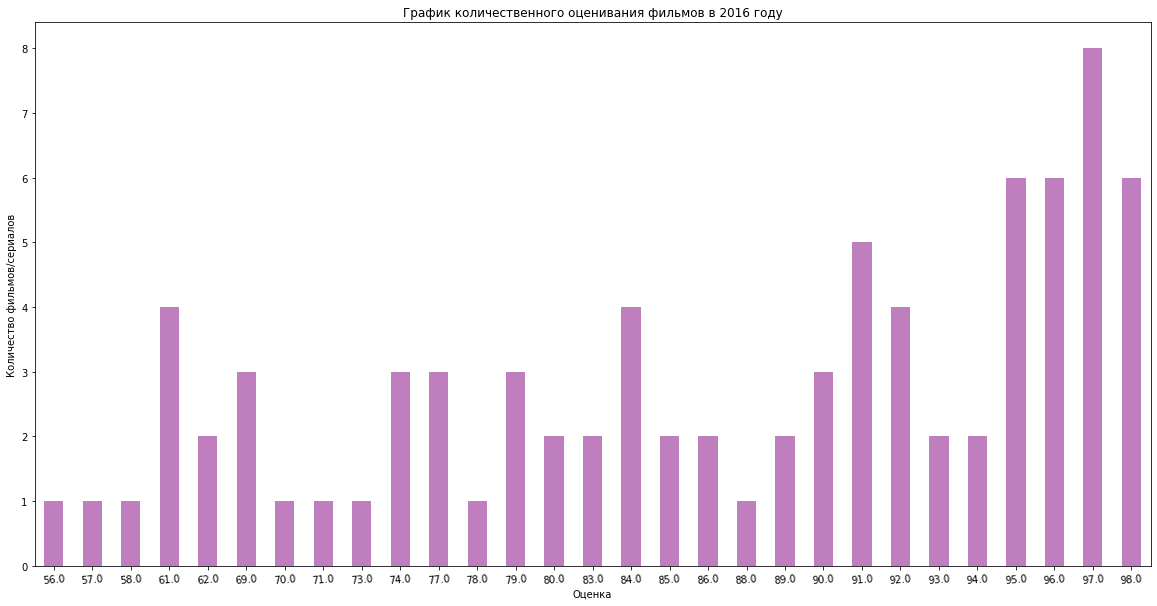

In [ ]:
#строи график 
plt.figure(figsize=(20,10)) #размер графика
graph2.plot.bar(color='purple', alpha=0.5) #
plt.xticks(rotation=5)
plt.xlabel("Оценка")
plt.ylabel("Количество фильмов/сериалов")
plt.title("График количественного оценивания фильмов в 2016 году")

plt.show()

In [ ]:
#Здесь нас также интересует распрделение оценок пользователей
checking_year['user rating score'].describe()

count    82.000000
mean     85.060976
std      12.221563
min      56.000000
25%      77.250000
50%      90.000000
75%      95.000000
max      98.000000
Name: user rating score, dtype: float64

В отсортированном списке у нас оказалось 82 шоу. Среднее арифметическое равно 85. Также, как в случае с сортировкой по воз.рейтингу, минимальное равно 56. Максимальное меньше, чем по возр.рейтингу и здесь оно равно 98. На удивление, наиболее часто встречающейся оценкой в этом году была оценка 90.
Для этой сортировки фильм находится в середине между 25 и 50%, что  оценивает его гораздо выше, чем по воз.рейтингу. 

В сортировке по году люди в целом ставили гораздо больше баллов.

In [ ]:
#Сделаем базу данных, где год равен 2016, а жанр соотвествует возрастному рейтингу TV-MA
this_and_that=data_new.loc[(data_new['release year'] == 2016) & (data_new['rating'] == 'TV-MA')]
this_and_that

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
17,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,110,2016,80.0,80
24,Marvel's Luke Cage,TV-MA,For mature audiences. May not be suitable for...,110,2016,95.0,80
26,Narcos,TV-MA,For mature audiences. May not be suitable for...,110,2016,94.0,80
30,The Do-Over,TV-MA,For mature audiences. May not be suitable for...,110,2016,84.0,80
32,3%,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82
43,Salvador Martinha - Tip of the Tongue,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82
45,O Amor no Div╠ú,TV-MA,NaN,110,2016,NaN,82
49,Pandora,TV-MA,NaN,110,2016,NaN,82
69,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,110,2016,97.0,80
71,American Horror Story,TV-MA,For mature audiences. May not be suitable for...,110,2016,90.0,80


In [ ]:
#Посчитала, сколько фильмов получило каждую оценку
graph3=this_and_that['user rating score'].dropna().value_counts().sort_index(ascending= True)
graph3

56.0    1
57.0    2
61.0    1
78.0    1
79.0    1
80.0    1
84.0    2
86.0    1
89.0    1
90.0    1
91.0    2
94.0    1
95.0    2
97.0    1
98.0    1
Name: user rating score, dtype: int64

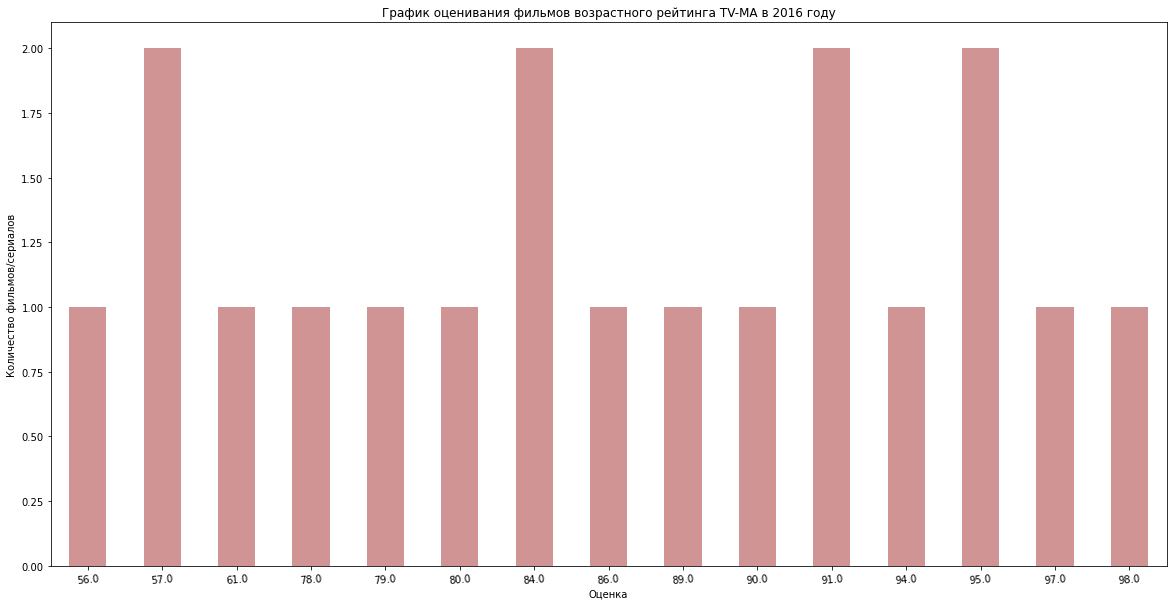

In [ ]:
#Строим график, который будет зависеть как от жанра, так и от года
plt.figure(figsize=(20,10)) #размер графика
graph3.plot.bar(color='brown', alpha=0.5) #
plt.xticks(rotation=5)
plt.xlabel("Оценка")
plt.ylabel("Количество фильмов/сериалов")
plt.title("График оценивания фильмов возрастного рейтинга TV-MA в 2016 году")

plt.show()

In [ ]:
#Вызваем функцию с описанием
this_and_that['user rating score'].describe()

count    19.000000
mean     82.210526
std      14.253962
min      56.000000
25%      78.500000
50%      86.000000
75%      92.500000
max      98.000000
Name: user rating score, dtype: float64

Число оценок заметно снизилось до 19 штук. Оценка шоу все еще ниже, чем среднее и максимальное, но при этом находится между 25 и 50%.

In [ ]:
#Теперь сделаем простейшую рекомендательную систему, предложив людям фильмы из того же жанра, 
#что и "Черное зеркало", примерно в том же диапазоне рейтинговых оценок

lets_find=data_new.loc[(data_new['release year'] == 2016) & (data_new['rating'] == 'TV-MA') &(data_new['user rating score'] >= 70)]
print('Людям, которым понравился сериал Black Mirror могут также понравиться следующие произведения:')
lets_find

Людям, которым понравился сериал Black Mirror могут также понравиться следующие произведения:


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
17,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,110,2016,80.0,80
24,Marvel's Luke Cage,TV-MA,For mature audiences. May not be suitable for...,110,2016,95.0,80
26,Narcos,TV-MA,For mature audiences. May not be suitable for...,110,2016,94.0,80
30,The Do-Over,TV-MA,For mature audiences. May not be suitable for...,110,2016,84.0,80
69,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,110,2016,97.0,80
71,American Horror Story,TV-MA,For mature audiences. May not be suitable for...,110,2016,90.0,80
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,110,2016,98.0,80
99,Only for One Night,TV-MA,NaN,110,2016,78.0,80
106,It's Always Sunny in Philadelphia,TV-MA,For mature audiences. May not be suitable for...,110,2016,91.0,80
122,Better Call Saul,TV-MA,For mature audiences. May not be suitable for...,110,2016,95.0,80
